In [2]:
import numpy as np
import matplotlib.pyplot as plt
import Utilities.camutils as camutils
import Utilities.calibration as calibration
import Utilities.decode as decode
import Utilities.visutils as visutils
import Utilities.testing as testing

from config import CAM1_CALIB, CAM2_CALIB, CHESSBOARD, CAM1_CALIB_EX, CAM2_CALIB_EX, MASK_PREFIX, COLOR_PREFIX, GRAB0

In [3]:
# Set up chessboard
chessboardDimensions = CHESSBOARD
cam1Images = calibration.getImages(CAM1_CALIB) # left
cam2Images = calibration.getImages(CAM2_CALIB) # right

Found 20 images
Found 20 images


In [4]:
# Intrinsic camera calibration
cam1K = calibration.intrinsic_Calibration(chessboardDimensions, cam1Images, False)
cam2K = calibration.intrinsic_Calibration(chessboardDimensions, cam2Images, False)
print(f"Cam1 K = {cam1K}")
print(f"Cam2 K = {cam2K}")

Cam1 K = [[1.40342239e+03 0.00000000e+00 9.59837032e+02]
 [0.00000000e+00 1.40116582e+03 5.83454863e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Cam2 K = [[1.41025245e+03 0.00000000e+00 9.63549938e+02]
 [0.00000000e+00 1.40794026e+03 5.99720531e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


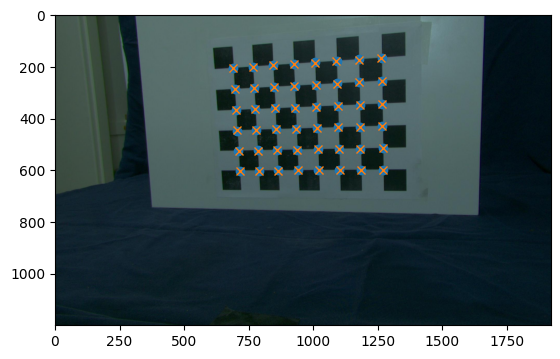

Camera : 
 f=1402.2941082854932 
 c=[[959.83703213 583.45486267]] 
 R=[[ 0.03884436  0.98981169  0.13698147]
 [ 0.97696218 -0.00883092 -0.2132297 ]
 [-0.20984758  0.14210849 -0.96735163]] 
 t = [[ 7.22817482 20.90563403 50.59019818]]


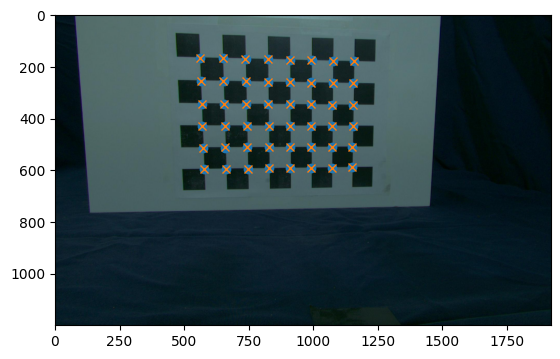

Camera : 
 f=1409.0963508438579 
 c=[[963.54993838 599.72053131]] 
 R=[[-0.00226799  0.99087013  0.13480073]
 [ 0.99277887 -0.01393666  0.11914652]
 [ 0.1199374   0.13409754 -0.98368332]] 
 t = [[ 8.29185692  7.74888118 51.40249373]]


In [5]:
# Extrinsic camera calibration
cam1Image = CAM1_CALIB_EX
cam2Image = CAM2_CALIB_EX

cam1, cam1_pts2, pts3 = calibration.extrinsic_Calibration(chessboardDimensions, cam1Image, cam1K)
cam2, cam2_pts2, pts3 = calibration.extrinsic_Calibration(chessboardDimensions, cam2Image, cam2K)

# Display
plt.figure()
pts2Lp = cam1.project(pts3)
imageLeft = plt.imread(cam1Image)
plt.imshow(imageLeft)
plt.plot(pts2Lp[0,:],pts2Lp[1,:],'o')
plt.plot(cam1_pts2[0,:],cam1_pts2[1,:],'x')
plt.show()
print(cam1)

plt.figure()
pts2Rp = cam2.project(pts3)
imageRight = plt.imread(cam2Image)
plt.imshow(imageRight)
plt.plot(pts2Rp[0,:],pts2Rp[1,:],'o')
plt.plot(cam2_pts2[0,:],cam2_pts2[1,:],'x')
plt.show()
print(cam2)


loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

Valid
Valid
Valid


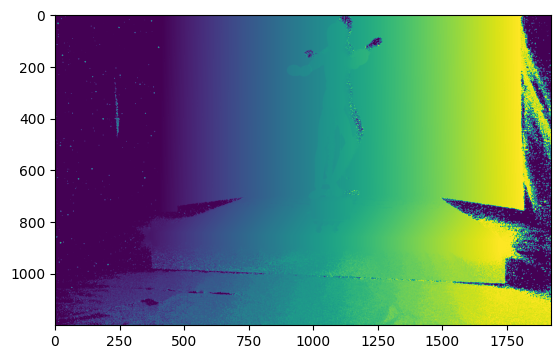

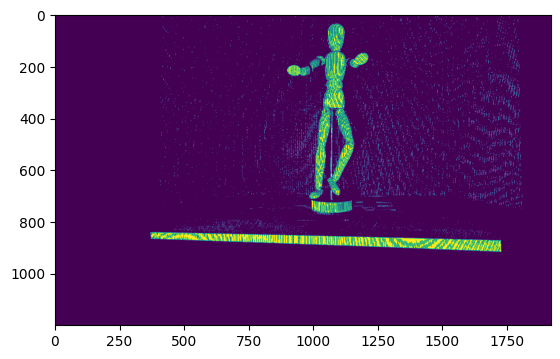

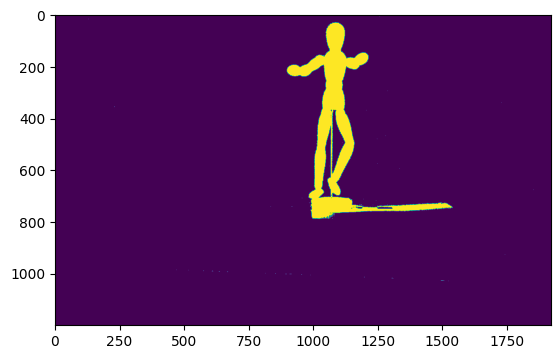

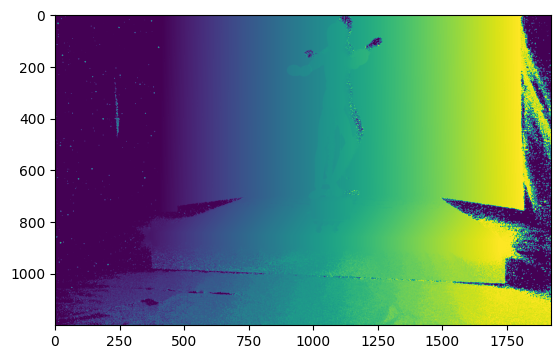

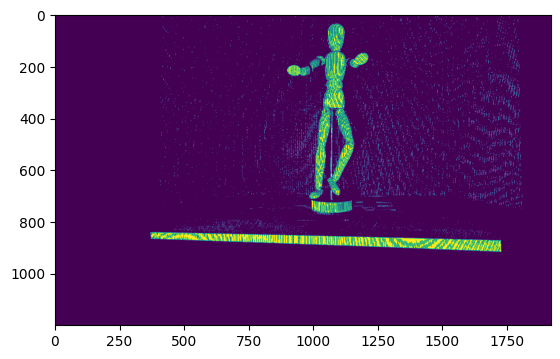

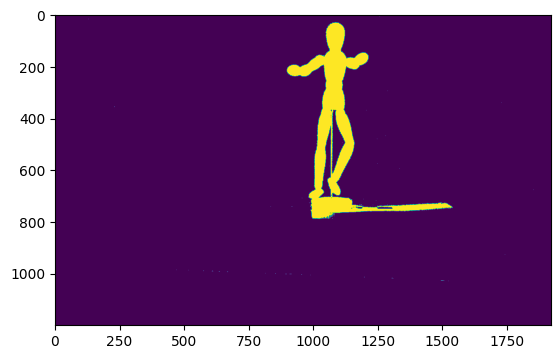

In [6]:
#( .png images)

# Code and gray mask
gray_threshold = 0.05
imagePrefix = MASK_PREFIX
code, mask = decode.decode_gray(imagePrefix, 0, gray_threshold)
plt.figure() 
plt.imshow(code)
plt.figure() 
plt.imshow(mask)

# Color mask 
color_threshold = 0.009
colorImagePrefix = COLOR_PREFIX
color_mask = decode.decode_color(colorImagePrefix, color_threshold)
plt.figure() 
plt.imshow(color_mask)


code1, mask1, color_mask1 = testing.decode(colorImagePrefix, imagePrefix, 0, color_threshold, gray_threshold) #imprefix_color,imprefix,start,threshold_color,threshold
plt.figure() 
plt.imshow(code1)
plt.figure() 
plt.imshow(mask1)
plt.figure() 
plt.imshow(color_mask1)

if code1.all() == code.all():
    print("Valid")
if mask1.all() == mask.all():
    print("Valid")
else:
    print("invalid")
if color_mask1.all() == color_mask.all():
    print("Valid")
else:
    print("invalid")


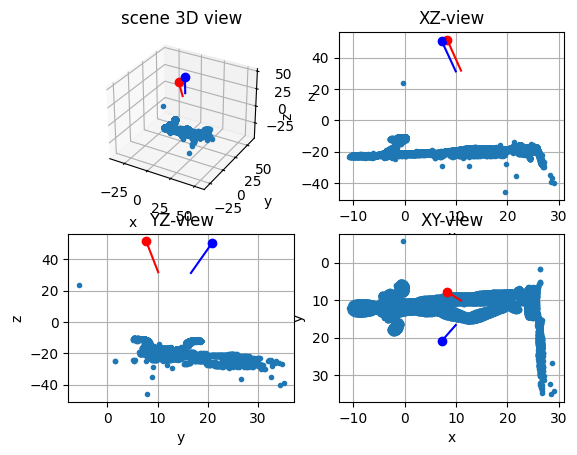

In [7]:

imprefixL1 = GRAB0[2]
imprefixL2 = GRAB0[0]
imprefixR1 = GRAB0[3]
imprefixR2 = GRAB0[1]

threshold1=0.006
threshold2=0.01

#pts2L,pts2R,pts3 = testing.reconstruct(imprefixL1,imprefixL2,imprefixR1,imprefixR2,threshold1,threshold2,cam1,cam2)
# imprefixL, imprefixR, gray_threshold, colorImprefixL, colorImprefixR, color_threshold, camL, camR
gray_threshold = 0.01
color_threshold = 0.006

pts2L,pts2R,pts3 = decode.reconstruct(GRAB0[0], GRAB0[1], gray_threshold, GRAB0[2], GRAB0[3], color_threshold, cam1, cam2)

visutils.vis_scene(cam1,cam2,pts3,looklength=20)

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

Valid
Valid
Valid
Valid
Valid


'\n# leftColor,leftPrefix,rightColor,rightPrefix,colorThreshold,imageThreshold,camL,camR\npts2L,pts2R,pts3,bvalues = testing.reconstruct(GRAB0[2],GRAB0[0], GRAB0[3], GRAB0[1],threshold1,threshold2,cam1,cam2)\nvisutils.vis_scene(cam1, cam2, pts3, looklength=20)\n\n# imprefixL, imprefixR, gray_threshold, colorImprefixL, colorImprefixR, color_threshold, camL, camR\npts2L,pts2R,pts3 = decode.reconstruct(imprefixL1,imprefixL2,imprefixR1,imprefixR2,threshold1,threshold2,cam1,cam2)\nvisutils.vis_scene(cam1, cam2, pts3, looklength=20)\n'

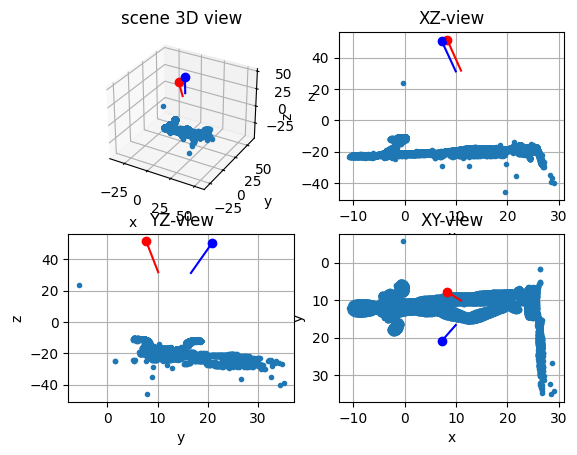

In [8]:
# Reconstruction
gray_threshold = 0.01
color_threshold = 0.006

threshold1=0.006
threshold2=0.01
imprefixL1 = GRAB0[2] # color
imprefixL2 = GRAB0[0] #image
imprefixR1 = GRAB0[3] #color
imprefixR2 = GRAB0[1] #image

# working
CLh,maskLh,cmaskL = testing.decode(imprefixL1,imprefixL2,0,threshold1,threshold2)
CLv,maskLv,_ = testing.decode(imprefixL1,imprefixL2,20,threshold1,threshold2)
CRh,maskRh,cmaskR = testing.decode(imprefixR1,imprefixR2,0,threshold1,threshold2)
CRv,maskRv,_ = testing.decode(imprefixR1,imprefixR2,20,threshold1,threshold2)

# not working
HL,HmaskL = decode.decode_gray(GRAB0[0], 0, gray_threshold)
VL,VmaskL = decode.decode_gray(GRAB0[0], 20, gray_threshold)
colorMaskL = decode.decode_color(GRAB0[2], color_threshold)

HR,HmaskR = decode.decode_gray(GRAB0[1], 0, gray_threshold)
VR,VmaskR = decode.decode_gray(GRAB0[1], 20, gray_threshold)
colorMaskR = decode.decode_color(GRAB0[3], color_threshold)


if np.array_equal(CLh,HL):
    print("Valid")
else:
    print("invalid")

if np.array_equal(maskLh,HmaskL):
    print("Valid")
else:
    print("invalid")

if np.array_equal(cmaskL,colorMaskL):
    print("Valid")
else:
    print("invalid")

if np.array_equal(CLv,VL):
    print("Valid")
else:
    print("invalid")

if np.array_equal(maskLv,VmaskL):
    print("Valid")
else:
    print("invalid")

pts2L,pts2R,pts3 = decode.reconstruct(GRAB0[0], GRAB0[1], gray_threshold, GRAB0[2], GRAB0[3], color_threshold, cam1, cam2)
visutils.vis_scene(cam1, cam2, pts3, looklength=20)

'''
# leftColor,leftPrefix,rightColor,rightPrefix,colorThreshold,imageThreshold,camL,camR
pts2L,pts2R,pts3,bvalues = testing.reconstruct(GRAB0[2],GRAB0[0], GRAB0[3], GRAB0[1],threshold1,threshold2,cam1,cam2)
visutils.vis_scene(cam1, cam2, pts3, looklength=20)

# imprefixL, imprefixR, gray_threshold, colorImprefixL, colorImprefixR, color_threshold, camL, camR
pts2L,pts2R,pts3 = decode.reconstruct(imprefixL1,imprefixL2,imprefixR1,imprefixR2,threshold1,threshold2,cam1,cam2)
visutils.vis_scene(cam1, cam2, pts3, looklength=20)
'''

AttributeError: 'function' object has no attribute 'decode_gray'